## Anamoly Deteciton using supervised learning 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

C:\Users\Ramesh\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv("housing.csv")

In [3]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
data.drop_duplicates()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [5]:
label_encoder = LabelEncoder()
data['mainroad'] = label_encoder.fit_transform(data['mainroad'])
data['guestroom'] = label_encoder.fit_transform(data['guestroom'])
data['basement'] = label_encoder.fit_transform(data['basement'])
data['hotwaterheating'] = label_encoder.fit_transform(data['hotwaterheating'])
data['airconditioning'] = label_encoder.fit_transform(data['airconditioning'])
data['prefarea'] = label_encoder.fit_transform(data['prefarea'])
data['furnishingstatus'] = label_encoder.fit_transform(data['furnishingstatus'])

In [6]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


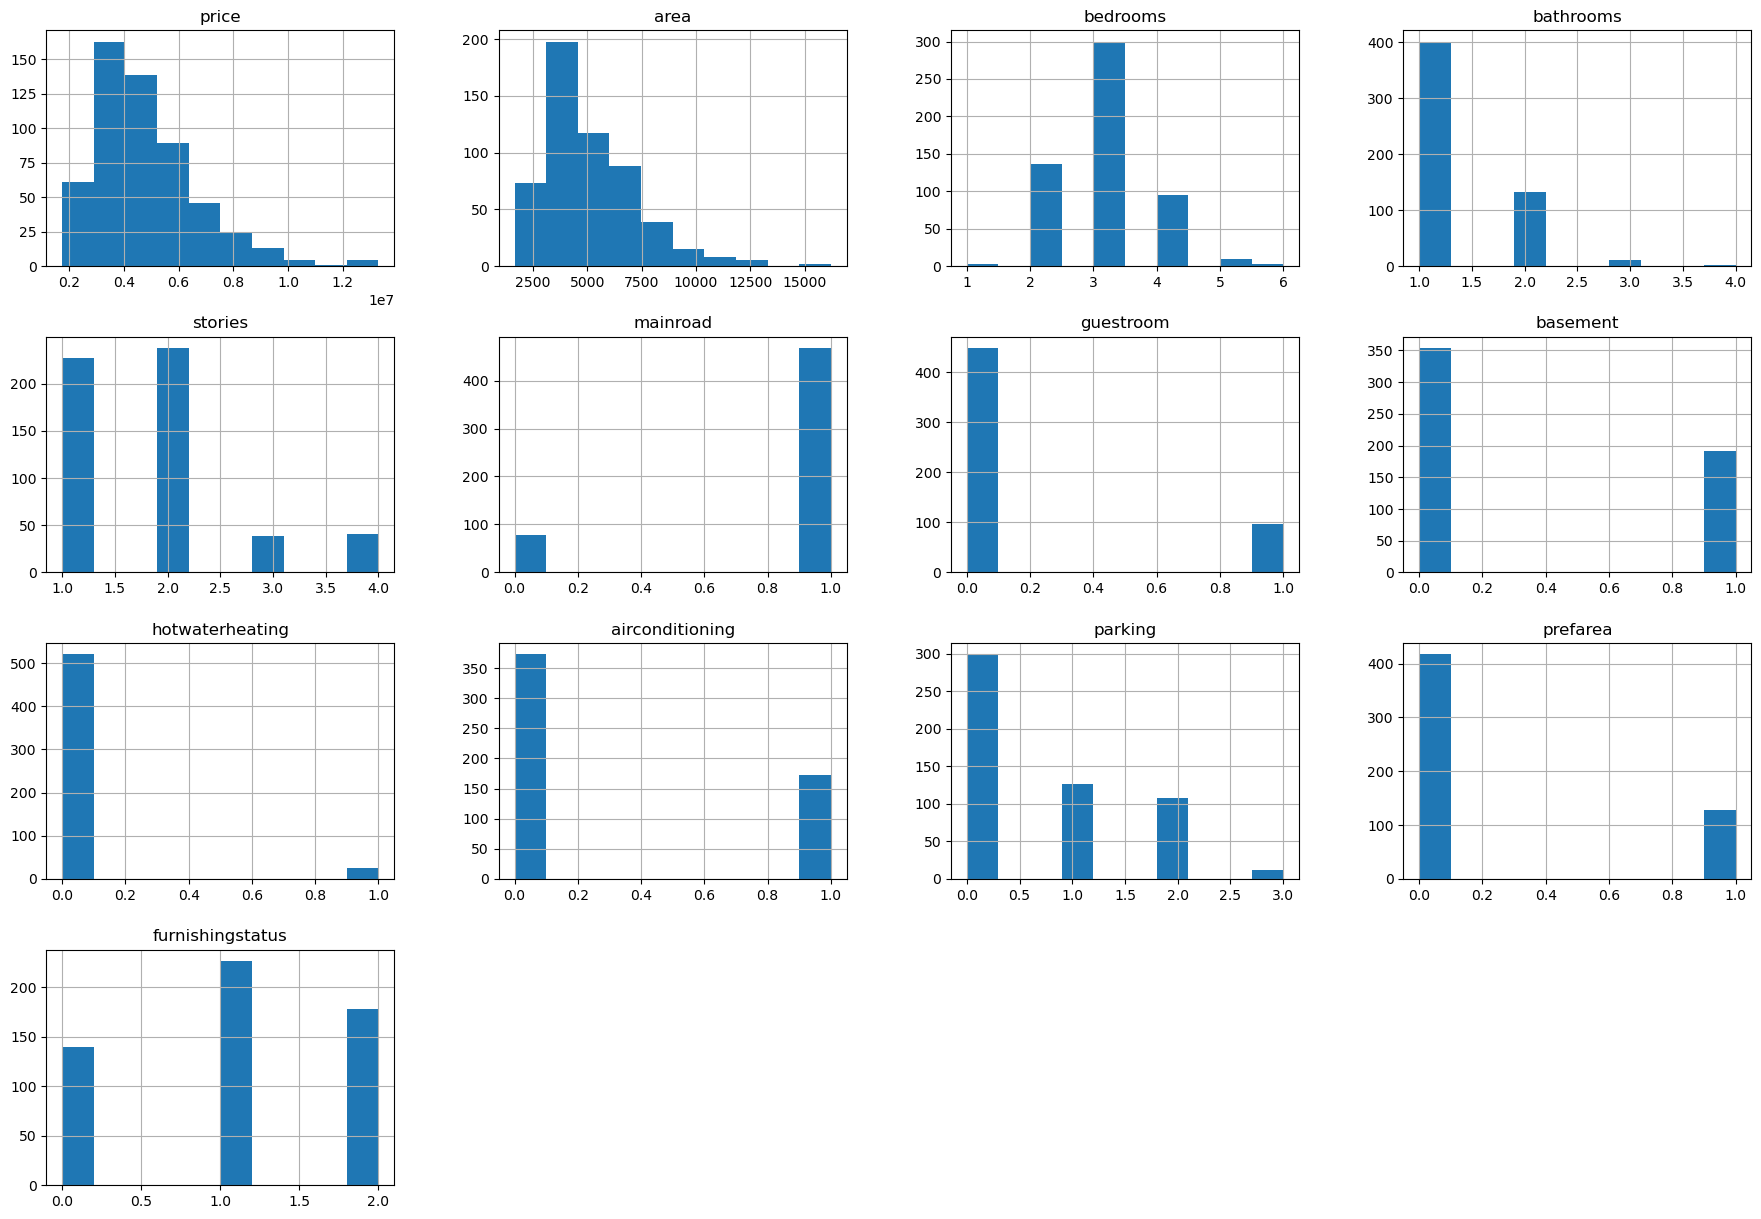

In [7]:
data.hist(figsize = (22, 15))
plt.show()

In [8]:
X = data.drop(['price'], axis=1)

In [9]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,2
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0,0


In [10]:
correlation = data.corr()['price']
correlation

price               1.000000
area                0.535997
bedrooms            0.366494
bathrooms           0.517545
stories             0.420712
mainroad            0.296898
guestroom           0.255517
basement            0.187057
hotwaterheating     0.093073
airconditioning     0.452954
parking             0.384394
prefarea            0.329777
furnishingstatus   -0.304721
Name: price, dtype: float64

## Area, bedrooms, bathroom, stories, airconditioning, parking

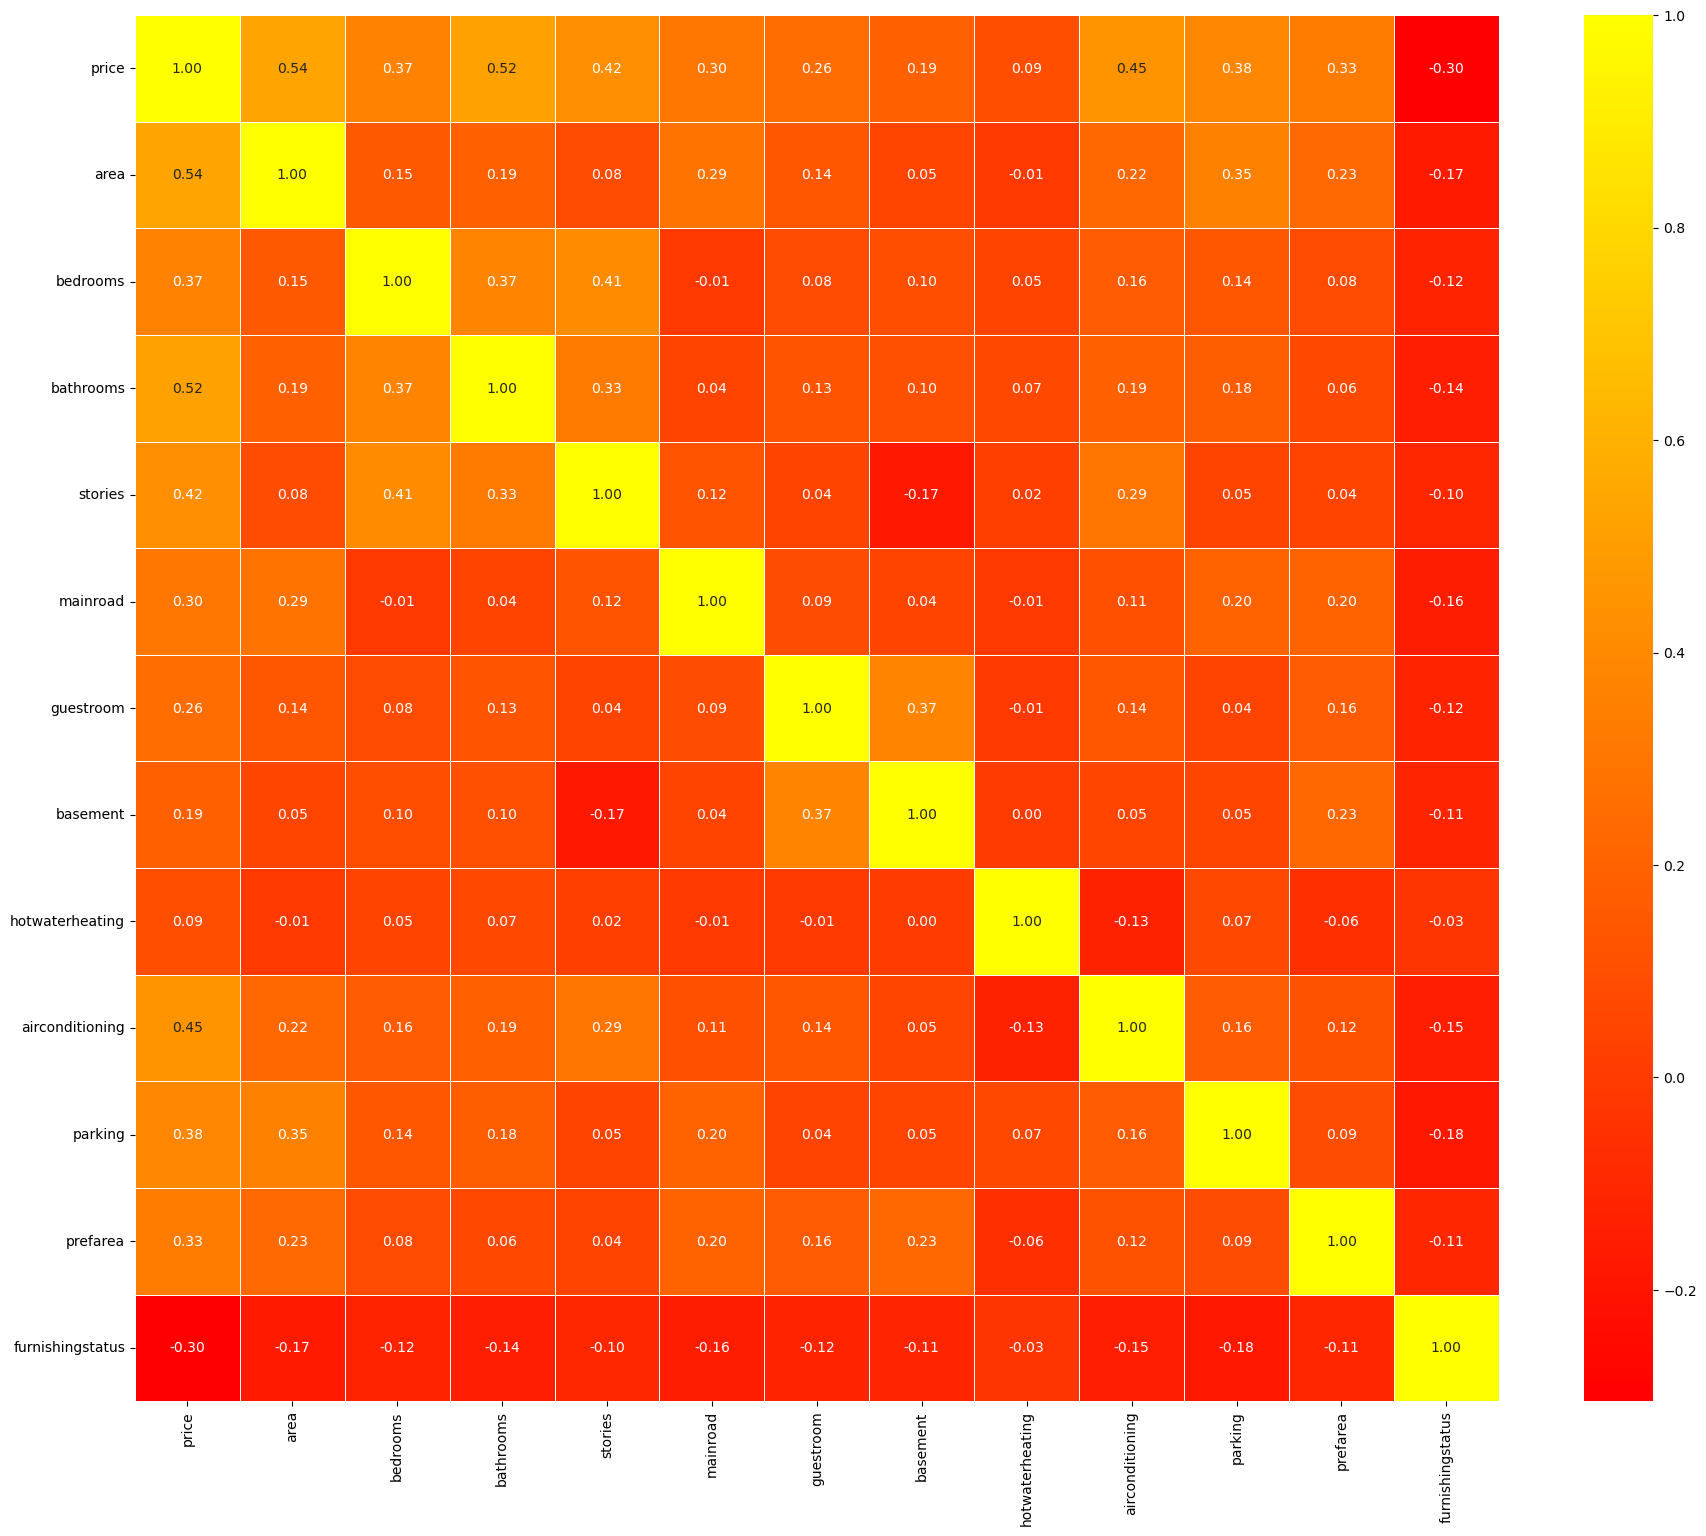

In [11]:
plt.figure(figsize=(22, 18))
sns.heatmap(data.corr(), cmap='autumn', annot=True, fmt=".2f", linewidths=0.5, cbar=True)
plt.show()

In [12]:
y = data['price']

In [13]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators = 200)

In [17]:
RFR.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

In [18]:
y_pred = RFR.predict(X_test)

In [19]:
y_test

316    4060000
77     6650000
360    3710000
90     6440000
493    2800000
        ...   
15     9100000
357    3773000
39     7910000
54     7350000
155    5530000
Name: price, Length: 109, dtype: int64

Text(0, 0.5, 'Predicted values')

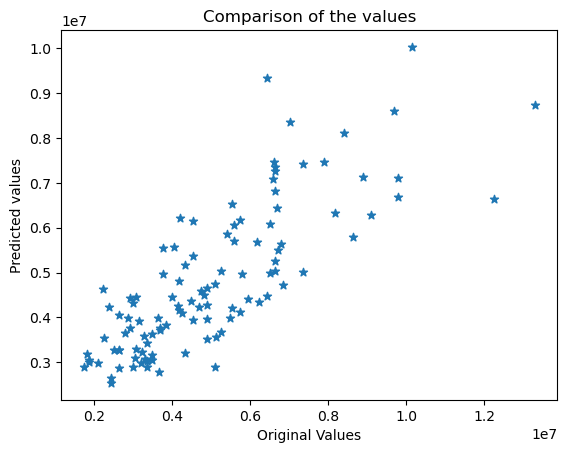

In [20]:
plt.scatter(y_test, y_pred, marker = "*")
plt.title("Comparison of the values")
plt.xlabel("Original Values")
plt.ylabel("Predicted values")

In [21]:
diff = list(y_pred-y_test)

In [22]:
diff

[1510180.0,
 622685.0,
 48895.0,
 -1967525.0,
 845285.0,
 -1377740.0,
 -217735.0,
 830060.0,
 205240.0,
 -465528.0,
 -115380.30000000075,
 609434.583333333,
 -337079.16666666605,
 78575.0,
 1265477.5,
 1395327.5,
 617473.5,
 -2329442.5,
 819630.0,
 1112597.5,
 -1222567.5,
 440405.0,
 1103771.666666666,
 -1566930.0,
 610960.0,
 -5607385.0,
 211120.0,
 -359730.0,
 -3104115.0,
 742420.0,
 -1161947.5,
 -334530.0,
 169365.0,
 1480920.0,
 -254240.0,
 2009315.0,
 -244440.0,
 292880.0,
 -448402.5,
 1853285.0,
 -1515640.0,
 -900048.333333333,
 709520.0,
 -624785.0,
 766395.0,
 -115640.0,
 501410.0,
 -1624000.0,
 -112350.0,
 1361850.0,
 -295124.2000000002,
 86975.0,
 -168560.0,
 441332.5,
 -79.16666666604578,
 1132633.25,
 -2698815.0,
 871570.0,
 827575.0,
 52619.58333333302,
 -10815.0,
 137550.0,
 -174860.0,
 1383375.0,
 -598500.0,
 -1517390.0,
 -255622.5,
 -2211860.0,
 1604662.5,
 -1604452.5,
 339010.0,
 94220.0,
 1180305.0,
 843325.0,
 -241955.0,
 -1393525.0,
 -466690.0,
 -326795.0,
 -2140775

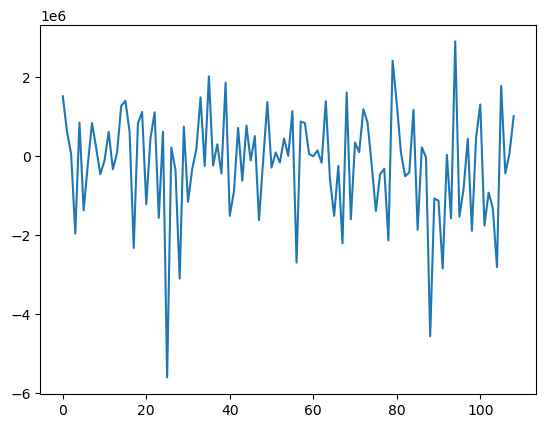

In [23]:
plt.plot(diff)

In [24]:
th = y.mean()
th

4766729.247706422

In [25]:
anomalies = np.abs(y_test - y_pred) > th
anomalies

316    False
77     False
360    False
90     False
493    False
       ...  
15     False
357    False
39     False
54     False
155    False
Name: price, Length: 109, dtype: bool

In [26]:
anomalies.value_counts()

False    108
True       1
Name: price, dtype: int64

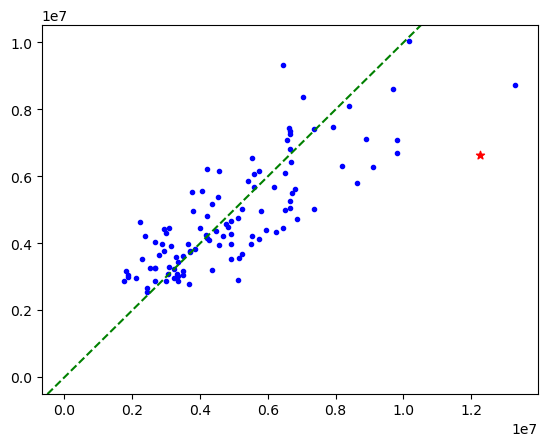

In [27]:
plt.scatter(y_test[~anomalies], y_pred[~anomalies], marker=".", label='Normal Predictions', color='blue')
plt.scatter(y_test[anomalies], y_pred[anomalies], marker="*", label='Anomalies', color='red')
plt.axline((0, 0), slope=1, linestyle='--', color='green', label='Threshold')